# Multiple Linear Regression

In [1]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_absolute_error,
mean_squared_error, r2_score)

In [2]:
df = pd.read_csv('heart.data.csv', index_col=0)

In [3]:
df

,biking,smoking,heart.disease
1,30.801246,10.896608,11.769423
2,65.129215,2.219563,2.854081
3,1.959665,17.588331,17.177803
4,44.800196,2.802559,6.816647
5,69.428454,15.974505,4.062224
...,...,...,...
494,47.660440,27.562464,11.294392
495,45.097203,21.385620,9.616762
496,8.279743,6.423720,13.495168
497,42.345863,20.741328,10.115865


In [4]:
df.describe()

,biking,smoking,heart.disease
count,498.000000,498.000000,498.000000
mean,37.788411,15.435034,10.174538
std,21.481519,8.289959,4.571874
min,1.119154,0.525850,0.551898
25%,20.204598,8.279776,6.513683
50%,35.824459,15.814614,10.385255
75%,57.852786,22.568925,13.724024
max,74.907111,29.946743,20.453496


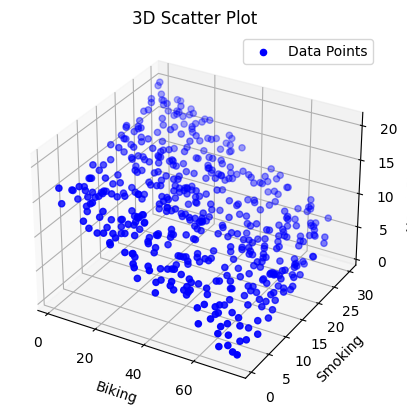

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['biking'], df['smoking'], df['heart.disease'], c='b', marker='o', label='Data Points')

ax.set_xlabel('Biking')
ax.set_ylabel('Smoking')
ax.set_zlabel('Heart Disease')

plt.title('3D Scatter Plot')
plt.legend()
plt.show()

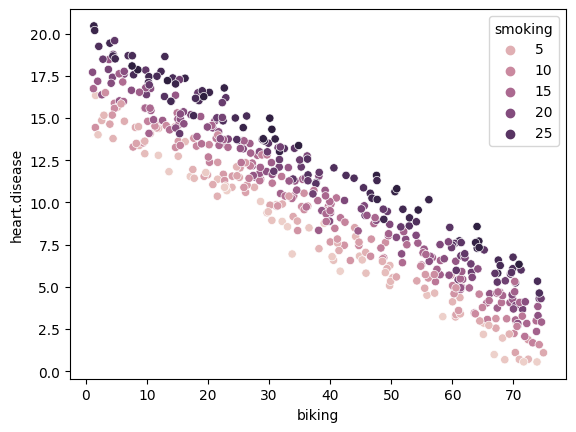

In [6]:
sns.scatterplot(data=df, x="biking", y="heart.disease", hue="smoking")
plt.show()

In [7]:
x = df[['biking','smoking']].values
y = df['heart.disease'].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [8]:
r2_score(y_test,y_pred)

0.9755078918468286

In [9]:
lr.intercept_, lr.coef_

(15.014199394828069, array([-0.20000393,  0.17730381]))

heart disease = 15 + (-0.2\*biking) + (0.178\*smoking) ± e

In [10]:
lr.predict(np.array([30.801246,10.896608]).reshape(1,-1))

array([10.78583936])

In [11]:
df.iloc[0]

biking           30.801246
smoking          10.896608
heart.disease    11.769423
Name: 1, dtype: float64

# Custom Multiple Linear Regression


In [12]:
class MultipleLinearRegression:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        X = np.column_stack((np.ones(X.shape[0]), X))
        
        # beta = (X^T * X)^(-1) * X^T * y
        X_transpose = X.T
        self.coefficients = np.dot(np.dot(inv(np.dot(X_transpose, X)), X_transpose), y)

    def predict(self, X):
        X = np.column_stack((np.ones(X.shape[0]), X))
        y_pred = np.dot(X, self.coefficients)
        return y_pred

    def coef_(self):
        return self.coefficients[1:]
    
    def intercept_(self):
        return self.coefficients[0]

In [13]:
model = MultipleLinearRegression()
model.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [14]:
r2_score(y_test, y_pred)

0.9755078918468286

In [15]:
model.intercept_(), model.coef_()

(15.01419939482808, array([-0.20000393,  0.17730381]))

In [16]:
model.predict(np.array([30.801246,10.896608]).reshape(1,-1))

array([10.78583936])

In [17]:
df.iloc[0]

biking           30.801246
smoking          10.896608
heart.disease    11.769423
Name: 1, dtype: float64

In [18]:
df

,biking,smoking,heart.disease
1,30.801246,10.896608,11.769423
2,65.129215,2.219563,2.854081
3,1.959665,17.588331,17.177803
4,44.800196,2.802559,6.816647
5,69.428454,15.974505,4.062224
...,...,...,...
494,47.660440,27.562464,11.294392
495,45.097203,21.385620,9.616762
496,8.279743,6.423720,13.495168
497,42.345863,20.741328,10.115865
